In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="max")

print(hist)

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
# df=pd.read_csv("/content/nifty1.csv")
df = hist

In [ ]:
df

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9642 entries, 1986-03-13 00:00:00-05:00 to 2024-06-14 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9642 non-null   float64
 1   High          9642 non-null   float64
 2   Low           9642 non-null   float64
 3   Close         9642 non-null   float64
 4   Volume        9642 non-null   int64  
 5   Dividends     9642 non-null   float64
 6   Stock Splits  9642 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 602.6 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9642.000000,9642.000000,9642.000000,9642.000000,9.642000e+03,9642.000000,9642.000000
mean,51.571066,52.094639,51.033355,51.586898,5.689305e+07,0.002991,0.001763
std,87.607251,88.433035,86.738459,87.637054,3.814202e+07,0.046596,0.058034
min,0.054693,0.056838,0.054693,0.055765,2.304000e+06,0.000000,0.000000
25%,3.503547,3.546978,3.451670,3.495102,3.218030e+07,0.000000,0.000000
50%,19.143602,19.379818,18.941822,19.154902,5.001600e+07,0.000000,0.000000
75%,37.940186,38.261005,37.667520,37.899477,7.086560e+07,0.000000,0.000000
max,440.850006,443.399994,439.369995,442.570007,1.031789e+09,3.080000,2.000000


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
open=df[['Open']]


In [ ]:
open.head()

,Open
Date,
1986-03-13 00:00:00-05:00,0.054693
1986-03-14 00:00:00-05:00,0.060055
1986-03-17 00:00:00-05:00,0.062199
1986-03-18 00:00:00-05:00,0.063272
1986-03-19 00:00:00-05:00,0.061663


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open)

In [ ]:
scaled_data

array([[0.046867  ],
       [0.05234381],
       [0.04996552],
       ...,
       [0.9988507 ],
       [0.99668082],
       [       nan]])

In [ ]:
l=len(scaled_data)

In [ ]:
time_stamp=60

In [ ]:
X_train,Y_train=[],[]

for i in range(time_stamp,l):
  X_train.append(scaled_data[i-time_stamp:i,0])
  Y_train.append(scaled_data[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)



In [ ]:
X_train


array([[0.046867  , 0.05234381, 0.04996552, ..., 0.03328379, 0.022606  ,
        0.02377063],
       [0.05234381, 0.04996552, 0.04528556, ..., 0.022606  , 0.02377063,
        0.02418744],
       [0.04996552, 0.04528556, 0.04347733, ..., 0.02377063, 0.02418744,
        0.02856705],
       ...,
       [0.94971267, 0.93849242, 0.94448412, ..., 0.92585929, 0.96694301,
        0.96836814],
       [0.93849242, 0.94448412, 0.91692232, ..., 0.96694301, 0.96836814,
        0.9988507 ],
       [0.94448412, 0.91692232, 0.92196699, ..., 0.96836814, 0.9988507 ,
        0.99668082]])

In [ ]:
Y_train

array([0.02418744, 0.02856705, 0.0171813 , ..., 0.9988507 , 0.99668082,
              nan])

In [ ]:
X_train=X_train.reshape((X_train.shape[0]),X_train.shape[1],1)

In [ ]:
X_train

array([[[0.046867  ],
        [0.05234381],
        [0.04996552],
        ...,
        [0.03328379],
        [0.022606  ],
        [0.02377063]],

       [[0.05234381],
        [0.04996552],
        [0.04528556],
        ...,
        [0.022606  ],
        [0.02377063],
        [0.02418744]],

       [[0.04996552],
        [0.04528556],
        [0.04347733],
        ...,
        [0.02377063],
        [0.02418744],
        [0.02856705]],

       ...,

       [[0.94971267],
        [0.93849242],
        [0.94448412],
        ...,
        [0.92585929],
        [0.96694301],
        [0.96836814]],

       [[0.93849242],
        [0.94448412],
        [0.91692232],
        ...,
        [0.96694301],
        [0.96836814],
        [0.9988507 ]],

       [[0.94448412],
        [0.91692232],
        [0.92196699],
        ...,
        [0.96836814],
        [0.9988507 ],
        [0.99668082]]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(units=50,return_sequences=True ,input_shape= (X_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
65/65 [==============================] - 7s 49ms/step - loss: nan
Epoch 2/100
65/65 [==============================] - 3s 48ms/step - loss: nan
Epoch 3/100
65/65 [==============================] - 5s 72ms/step - loss: nan
Epoch 4/100
65/65 [==============================] - 3s 47ms/step - loss: nan
Epoch 5/100
65/65 [==============================] - 3s 48ms/step - loss: nan
Epoch 6/100
65/65 [==============================] - 3s 49ms/step - loss: nan
Epoch 7/100
65/65 [==============================] - 5s 73ms/step - loss: nan
Epoch 8/100
65/65 [==============================] - 3s 49ms/step - loss: nan
Epoch 9/100
65/65 [==============================] - 3s 49ms/step - loss: nan
Epoch 10/100
65/65 [==============================] - 3s 49ms/step - loss: nan
Epoch 11/100
65/65 [==============================] - 5s 74ms/step - loss: nan
Epoch 12/100
65/65 [==============================] - 3s 49ms/step - loss: nan
Epoch 13/100
65/65 [==============================] - 3s 49ms

In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare test data similar to training data
total_data = np.concatenate((train_data[-60:], test_data), axis=0)
x_test=[]
for i in range(60,len(total_data)):
  x_test.append(total_data[i-60:i,0])
x_test=np.array(x_test)

x_test= x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [ ]:
stock_market_prediction=model.predict(x_test)
stock_market_prediction=scaler.inverse_transform(stock_market_prediction)
stock_market_prediction=stock_market_prediction.flatten()
df.columns = df.columns.str.strip()

14/14 [==============================] - 1s 54ms/step


In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, open, color='blue', label='Actual Stock Price')
predicted_dates = df.index[-len(stock_market_prediction):]
plt.plot(predicted_dates, stock_market_prediction.flatten(), color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

**Random Forest Implementation for Stock Price Prediction**

In [ ]:

df.columns=df.columns.str.strip()
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
# df.index =df.index.strftime('%Y-%m-%d')
df.index=pd.to_datetime(df.index);
df.index=df.index.date

df.index



Index([1986-03-13, 1986-03-14, 1986-03-17, 1986-03-18, 1986-03-19, 1986-03-20,
       1986-03-21, 1986-03-24, 1986-03-25, 1986-03-26,
       ...
       2024-06-05, 2024-06-06, 2024-06-07, 2024-06-10, 2024-06-11, 2024-06-12,
       2024-06-13, 2024-06-14, 2024-06-17, 2024-06-18],
      dtype='object', length=9644)

In [ ]:

df['Date']=pd.to_datetime(df.index)
df['Date']=df['Date']=pd.to_datetime(df['Date'])
df['Date']

1986-03-13   1986-03-13
1986-03-14   1986-03-14
1986-03-17   1986-03-17
1986-03-18   1986-03-18
1986-03-19   1986-03-19
                ...    
2024-06-12   2024-06-12
2024-06-13   2024-06-13
2024-06-14   2024-06-14
2024-06-17   2024-06-17
2024-06-18   2024-06-18
Name: Date, Length: 9644, dtype: datetime64[ns]

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date'],
      dtype='object')

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
1986-03-13,0.054792,0.062849,0.054792,0.060163,1031788800,0.0,0.0,1986-03-13
1986-03-14,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0,1986-03-14
1986-03-17,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0,1986-03-17
1986-03-18,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0,1986-03-18
1986-03-19,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0,1986-03-19
...,...,...,...,...,...,...,...,...
2024-06-12,435.320007,443.399994,433.250000,441.059998,22366200,0.0,0.0,2024-06-12
2024-06-13,440.850006,443.390015,439.369995,441.579987,15960600,0.0,0.0,2024-06-13
2024-06-14,438.279999,443.140015,436.720001,442.570007,13582000,0.0,0.0,2024-06-14
2024-06-17,442.589996,450.940002,440.720001,448.369995,20790000,0.0,0.0,2024-06-17


In [ ]:
open=df[['Open']]

In [ ]:
open.head()

,Open
1986-03-13,0.054792
1986-03-14,0.060163
1986-03-17,0.062311
1986-03-18,0.063386
1986-03-19,0.061774


In [ ]:
df['open1']=df['Open'].shift(1)
df['open2']=df['Open'].shift(2)
df['open3']=df['Open'].shift(3)
df['open4']=df['Open'].shift(4)
df['open5']=df['Open'].shift(5)
df=df.dropna()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,open1,open2,open3,open4,open5
1986-03-31,0.059626,0.059626,0.058014,0.059089,12873600,0.0,0.0,1986-03-31,0.058551,0.056940,0.055866,0.057477,0.059089
1986-04-01,0.059089,0.059089,0.058551,0.058551,11088000,0.0,0.0,1986-04-01,0.059626,0.058551,0.056940,0.055866,0.057477
1986-04-02,0.058551,0.060163,0.058551,0.059089,27014400,0.0,0.0,1986-04-02,0.059089,0.059626,0.058551,0.056940,0.055866
1986-04-03,0.059626,0.061237,0.059626,0.059626,23040000,0.0,0.0,1986-04-03,0.058551,0.059089,0.059626,0.058551,0.056940
1986-04-04,0.059626,0.060163,0.059626,0.059626,26582400,0.0,0.0,1986-04-04,0.059626,0.058551,0.059089,0.059626,0.058551


In [ ]:

x=df[['open1','open2','open3','open4','open5']].values
y=df['Open'].values

In [ ]:
x

array([[5.85514483e-02, 5.69400436e-02, 5.58657929e-02, 5.74771855e-02,
        5.90886048e-02],
       [5.96257230e-02, 5.85514483e-02, 5.69400436e-02, 5.58657929e-02,
        5.74771855e-02],
       [5.90885846e-02, 5.96257230e-02, 5.85514483e-02, 5.69400436e-02,
        5.58657929e-02],
       ...,
       [4.40850006e+02, 4.35320007e+02, 4.25480011e+02, 4.24700012e+02,
        4.26200012e+02],
       [4.38279999e+02, 4.40850006e+02, 4.35320007e+02, 4.25480011e+02,
        4.24700012e+02],
       [4.42589996e+02, 4.38279999e+02, 4.40850006e+02, 4.35320007e+02,
        4.25480011e+02]])

In [ ]:
y

array([5.96257230e-02, 5.90885846e-02, 5.85514525e-02, ...,
       4.38279999e+02, 4.42589996e+02, 4.49709991e+02])

In [ ]:
df.shape,x.shape,y.shape

((9633, 13), (9633, 5), (9633,))

In [ ]:
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.2,random_state=7612);

In [ ]:

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=7612,n_estimators=100);
model.fit(x_train,y_train)

RandomForestRegressor(random_state=7612)

In [ ]:
p_y=model.predict(x_test)

In [ ]:

from sklearn.metrics import mean_squared_error

mean_squared_error(p_y,y_test)

4.144445716348109

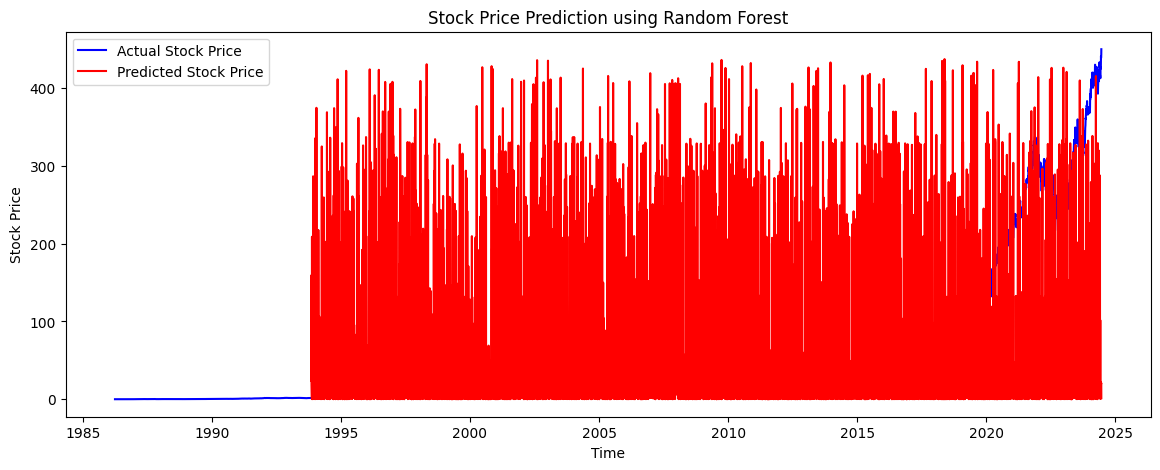

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'] , df['Open'], color='blue', label='Actual Stock Price')
test_dates = df['Date'].iloc[-len(y_test):].values
plt.plot(test_dates, p_y, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()